In [241]:
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from scipy.special import binom
from scipy.stats import binom
import random
import pandas as pd
import matplotlib 
import matplotlib.pyplot as plt

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.widgets import Slider, Button
from matplotlib.widgets import Button, RadioButtons, CheckButtons, TextBox

In [242]:
%matplotlib widget
fig.canvas.toolbar_visible = False

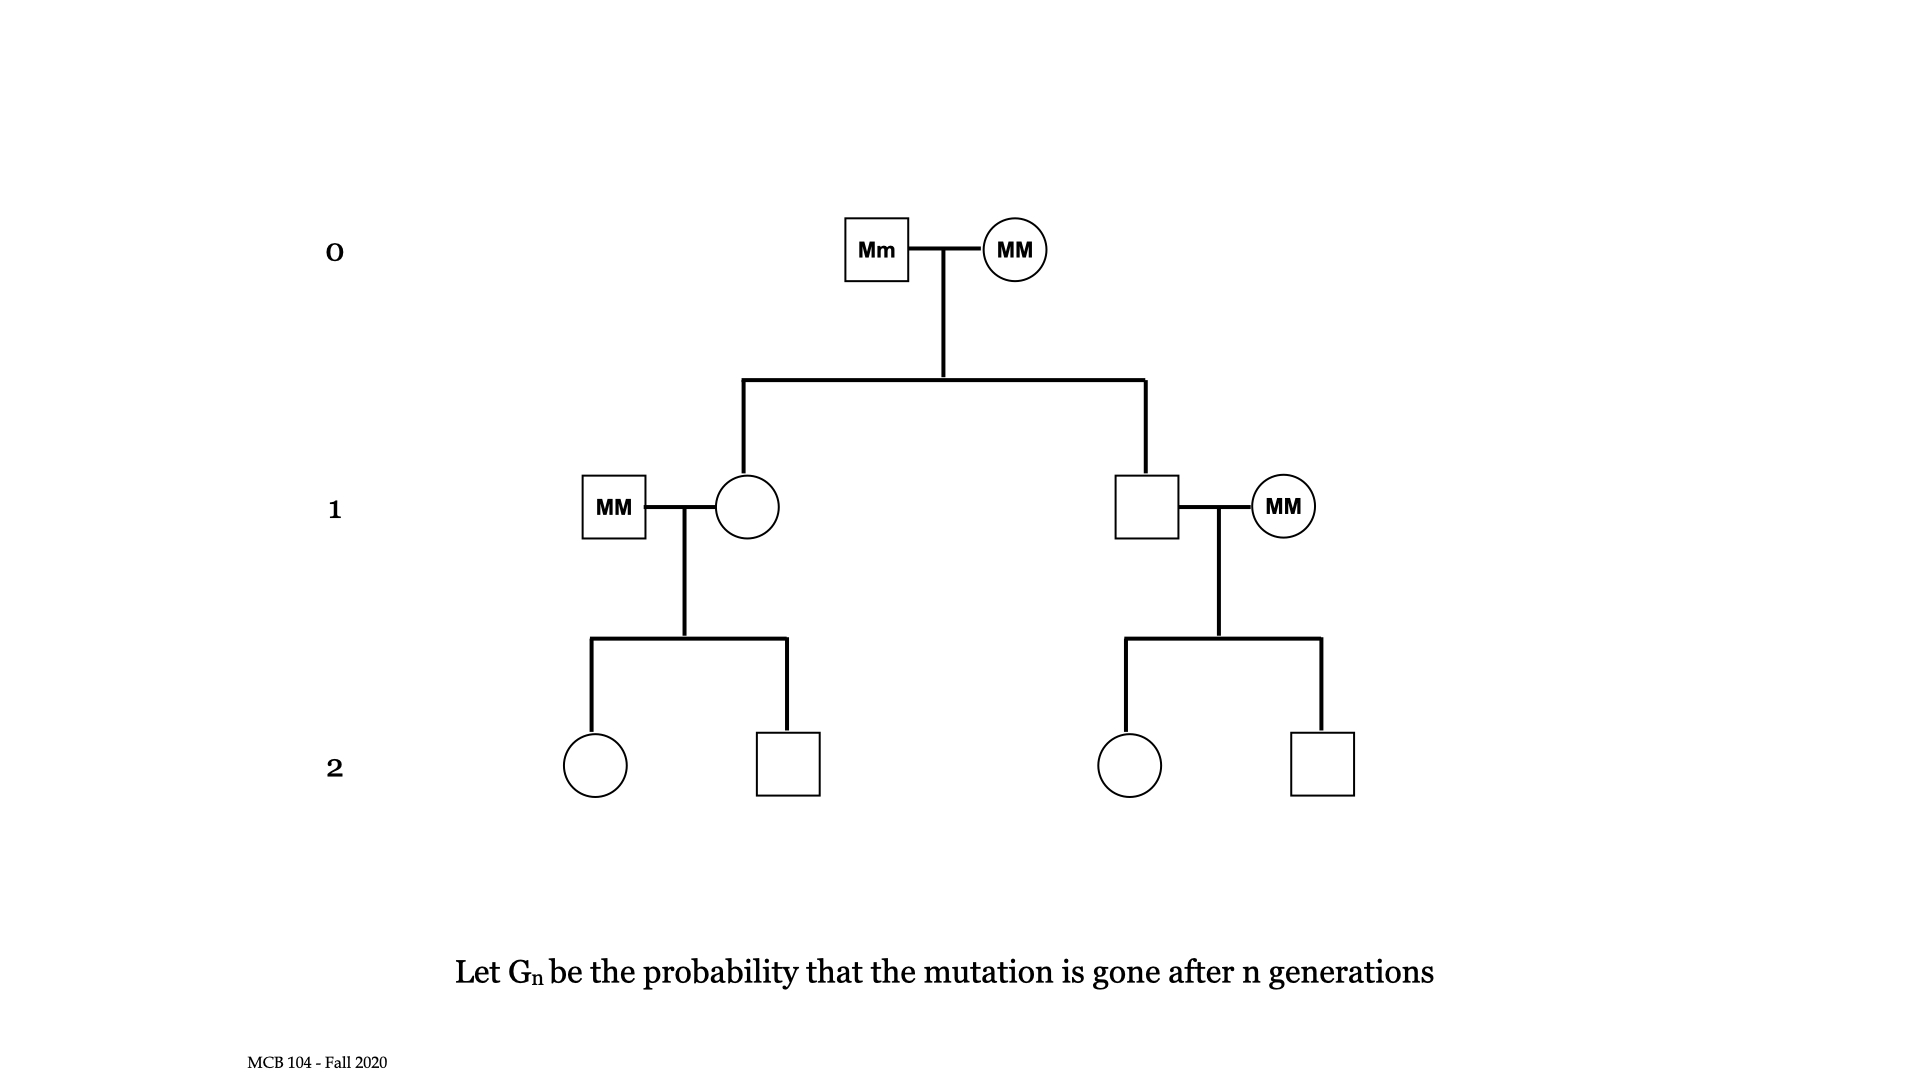

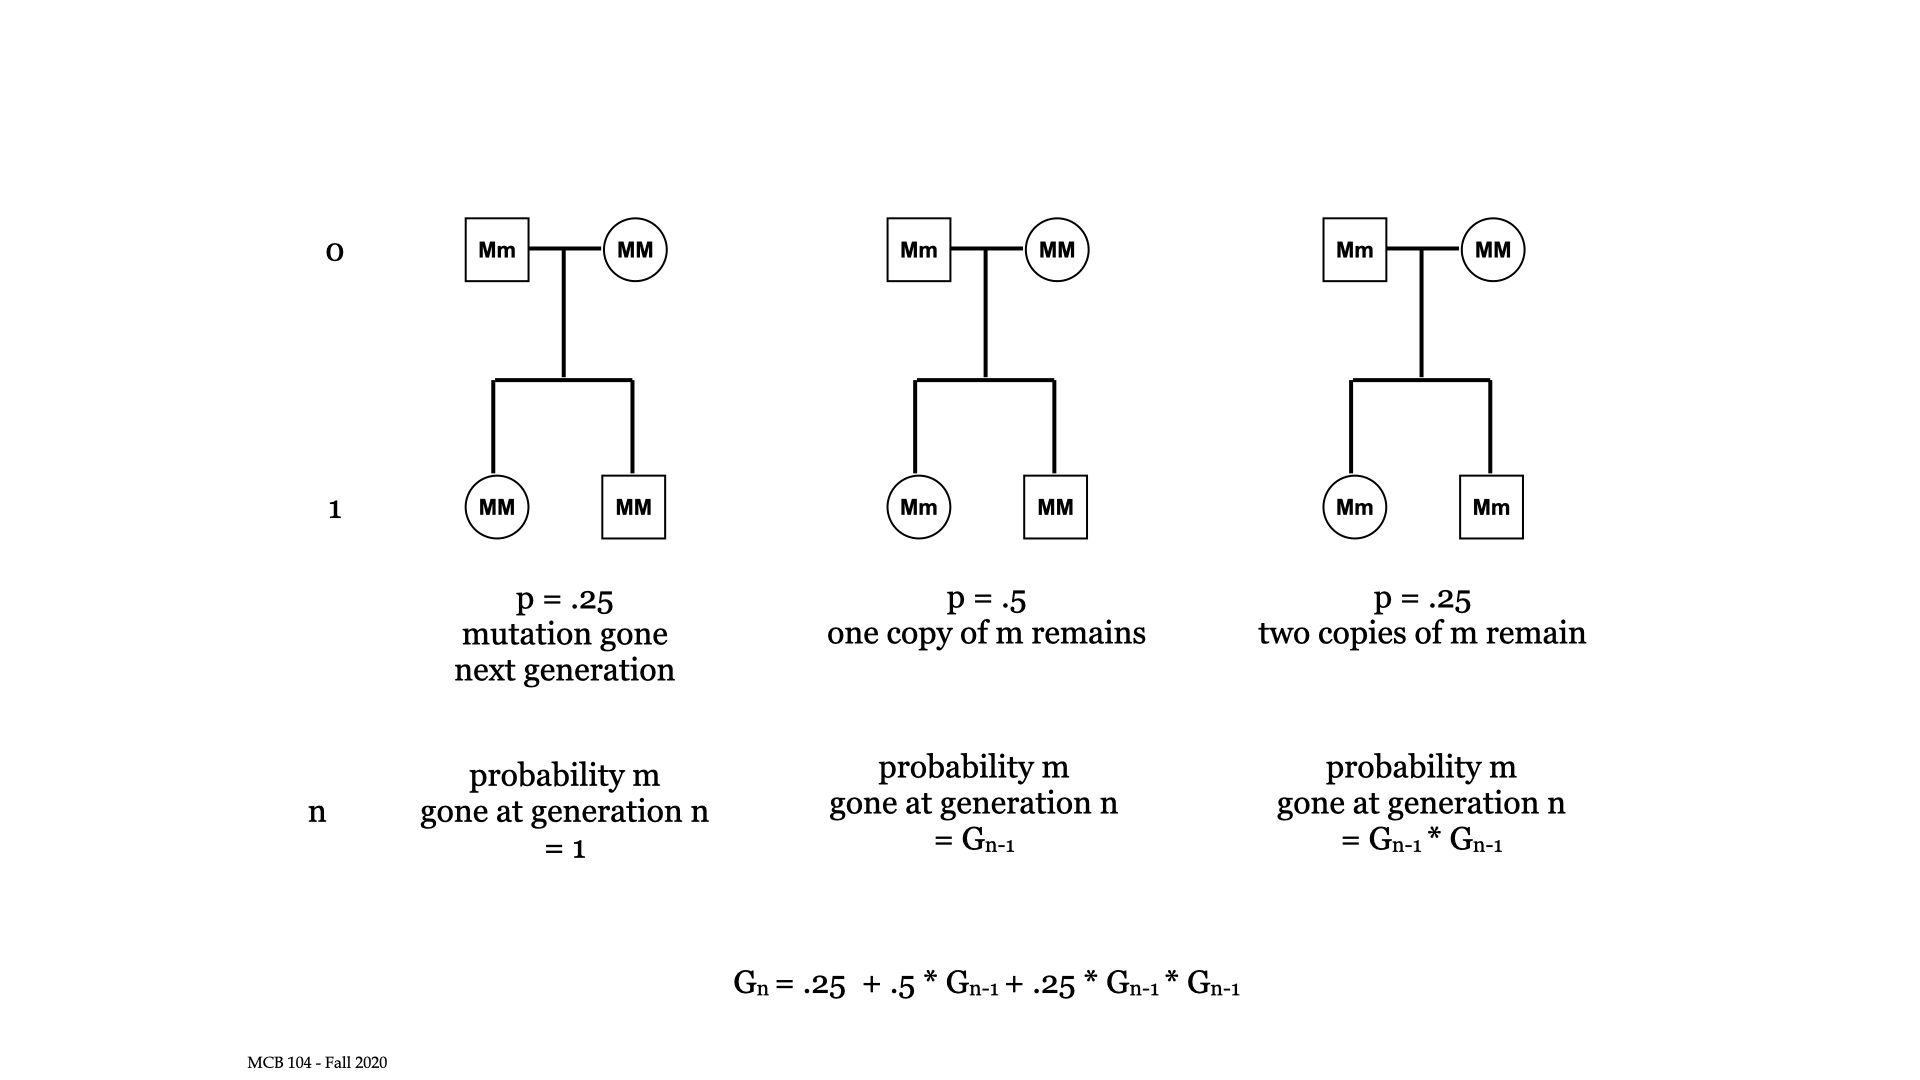

In [243]:
G = [0]

for generation in range(0,100000):
    G.append(.25 + .5 * G[-1] + .25 * G[-1]*G[-1])
    

In [244]:
figname = "Mutation Survival Probability 1"
# close previous instance
plt.close(figname)
fig = plt.figure(figname)
ax = fig.subplots(1,1)
fig.canvas.toolbar_visible = False
p, = ax.plot(1-np.array(G))
ax.set_xlim(0,100)
ax.set_xlabel('generation')
ax.set_ylabel('p mutation survives')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [245]:
figname = "Mutation Survival Probability 2"
# close previous instance
plt.close(figname)
fig = plt.figure(figname)
ax = fig.subplots(1,1)
fig.canvas.toolbar_visible = False
p, = ax.plot(1-np.array(G))
ax.set_xlim(0,10000)
ax.set_xlabel('generation')
ax.set_ylabel('p mutation survives')
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [246]:
kp = [.1,.2,.4,.2,.1]
GT = [0]

for generation in range(0,1000):
    ng = 0
    for i,p in enumerate(kp):
        rv = binom(i,.5)
        for j in range(0,i+1):
            ng += p * rv.pmf(j) * np.power(GT[-1],j)
    GT.append(ng)


In [247]:
figname = "Mutation Survival Probability Comparison"
# close previous instance
plt.close(figname)
fig = plt.figure(figname)

ax = fig.subplots(1,1)
p1, = ax.plot(1-np.array(G),c='red',label='2 kpg')
p2, = ax.plot(1-np.array(GT),c='blue',label='variable kpg')

ax.set_xlim(0,1000)
ax.set_yscale('log')
plt.legend()
plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
kpg = 2  # kids per generation
kpgc = [2]

transprob = 0.50 # probability that a kid will inherit mutation

trials = 5000        # number of trials to run
maxg = 5000           # maximum number of generations per trial

extinct_time = []     # time to extinction for each trial
extincted = np.zeros(maxg, dtype=int)

survivor_pops = []    # population size at each generation for survivors
extinct_pops = []     # population size at each generation for non-survivors

for t in range(0,trials):  # trial loop
    
    n = 1     # population size
    gens = 0
    pop = []  # population size at each generation
    
    while (n > 0 and n < 10000 and gens < maxg): # generation loop 
        pop.append(n)
        gens += 1
        nextn = 0
        for p in range(0,n):
            kids = random.choice(kpgc)
            for k in range(0,kids):
                if (random.random() < transprob):
                    nextn += 1
        n = nextn
        
    if n == 0:
        extinct_time.append(gens)
        extincted[gens] += 1
        extinct_pops.append(pop)
    else:
        survivor_pops.append(pop)
    
        
print ("\n\n\nNumber of %d trials that ended with survivors after %d generations = %d\n\n\n" % (trials,maxg,len(survivor_pops))
      )
fracremaining = np.zeros(maxg, dtype=float)

e = 0
for i in range(0,maxg):
    e += extincted[i]
    fracremaining[i] = 1.0 - float(e)/float(trials)




Number of 5000 trials that ended with survivors after 5000 generations = 5





In [248]:
all_pops_sorted = sorted(survivor_pops + extinct_pops, key = lambda x: np.max(x), reverse = True)

all_pops = np.zeros((5000,5000))
for i,a in enumerate(all_pops_sorted):
    all_pops[i][0:len(a)] = np.array(a)

In [249]:
pops = all_pops
plot_ind = 0

figname = "All Population"
# close previous instance
plt.close(figname)
fig = plt.figure(figname)

# shut off widgets toolbar

fig.canvas.toolbar_visible = False


ax = fig.subplots()
plt.subplots_adjust(left = .20, bottom = 0.20)
p, = ax.plot(pops[plot_ind],color='black',alpha=.25)
ax.set_xlabel("Generations")
ax.set_ylabel("Population Size")

ymax = 1.1 * np.max(pops[plot_ind])
ax.set_ylim(0,ymax)
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))



class Index:
    plot_ind = 0
    ax = ''
    tbox = ''
    
    def button_next(self, event):
        self.plot_ind = min(len(pops) -1, self.plot_ind + 1)
        self.plot()

    def button_prev(self,event):
        self.plot_ind = max(0, self.plot_ind - 1)
        self.plot()
        
    def submit(self,event):
        self.plot_ind = eval(event)
        self.plot()
        
    def plot(self):
        
        self.tbox.set_val(self.plot_ind)
        
        p.set_ydata(pops[self.plot_ind])
        
        ymax = 1.1 * np.max(pops[self.plot_ind])
        self.ax.set_ylim(0,ymax)
        self.ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        
        self.ax.set_xlim(0,5000)
        
        if pops[self.plot_ind][1000] == 0:
            self.ax.set_xlim(0,1000)
            
        if pops[self.plot_ind][100] == 0:
            self.ax.set_xlim(0,100)
            
        #self.ax.title.set_text("%d" % self.plot_ind)
        fig.canvas.draw_idle()

callback = Index()
callback.ax = ax

axprev = plt.axes([0.70, 0.025, 0.1, 0.075])
axval  = plt.axes([0.20, 0.025, 0.1, 0.075])
axnext = plt.axes([0.81, 0.025, 0.1, 0.075])
bnext = Button(axnext, 'Next')
bnext.on_clicked(callback.button_next)
bprev = Button(axprev, 'Previous')
bprev.on_clicked(callback.button_prev)
tval = TextBox(axval, "Pop #: ", initial = 0)
callback.tbox = tval
tval.on_submit(callback.submit)
tval.set_val(10)


#axslide = plt.axes([0.25, 0.2, 0.65, 0.03])
#pnum = Slider(axslide,'pnum', 0,len(survivor_pops)-1,valstep = 1)

#def update(val):
#    p.set_ydata(survivor_pops[pnum.val])
#    ax.set_ylim(0,1.1 * np.max(survivor_pops[pnum.val]))
 
# Call update function when slider value is changed
#pnum.on_changed(update)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [176]:
for i in range(0,20):
    plt.close()

In [185]:
figname = "Fraction Remaining"
plt.close(figname)

fig = plt.figure("Fraction Remaining", figsize=(8,8))
fig.canvas.toolbar_visible = False

ax = plt.subplot(211)
ax.set_xlabel("generation", fontsize=14)
ax.set_ylabel("fraction remaining", fontsize=14)
ax.bar(range(0,50),fracremaining[0:50])

ax = plt.subplot(212)
ax.set_xlabel("generation", fontsize=18)
ax.set_ylabel("fraction remaining", fontsize=14)
ax.bar(range(0,1000,20),fracremaining[0:1000:20],width=14)

plt.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [190]:
from numpy.random import default_rng
rng = default_rng()

In [191]:
pop = 100000
gens = 10000
trials = 1000
start = 1

r_b1 = np.zeros((trials,gens))

for t in range(0,trials):
    alleles = start
    for g in range(0,gens):
        alleles = rng.binomial(2*pop,alleles/(2*pop))
        r_b1[t][g] = alleles
        if alleles == 0:
            break

In [192]:
pop = 100000
gens = 10000
trials = 1000
start = 10

r_b10 = np.zeros((trials,gens))

for t in range(0,trials):
    alleles = start
    for g in range(0,gens):
        alleles = rng.binomial(2*pop,alleles/(2*pop))
        r_b10[t][g] = alleles
        if alleles == 0:
            break

In [193]:
pop = 100000
gens = 10000
trials = 1000
start = 100

r_b100 = np.zeros((trials,gens))

for t in range(0,trials):
    alleles = start
    for g in range(0,gens):
        alleles = rng.binomial(2*pop,alleles/(2*pop))
        r_b100[t][g] = alleles
        if alleles == 0:
            break

In [195]:
pop = 100000
gens = 10000
trials = 1000
start = 1000

r_b1000 = np.zeros((trials,gens))

for t in range(0,trials):
    alleles = start
    for g in range(0,gens):
        alleles = rng.binomial(2*pop,alleles/(2*pop))
        r_b1000[t][g] = alleles
        if alleles == 0:
            break

In [194]:
pop = 100000
gens = 10000
trials = 1000
start = 5000

r_b5000 = np.zeros((trials,gens))

for t in range(0,trials):
    alleles = start
    for g in range(0,gens):
        alleles = rng.binomial(2*pop,alleles/(2*pop))
        r_b5000[t][g] = alleles
        if alleles == 0:
            break

In [203]:
figname = "Fraction Remaining Different Starts"
plt.close(figname)

fig = plt.figure(figname)

ax = plt.subplot(111)
ax.plot(np.sum(np.where(r_b1 > 0,1,0),axis=0)/1000,label='1')
ax.plot(np.sum(np.where(r_b10 > 0,1,0),axis=0)/1000,label='10')
ax.plot(np.sum(np.where(r_b100 > 0,1,0),axis=0)/1000,label='100')
ax.plot(np.sum(np.where(r_b1000 > 0,1,0),axis=0)/1000,label='1000')
ax.plot(np.sum(np.where(r_b5000 > 0,1,0),axis=0)/1000,label='5000')
ax.set_xlim(0,10000)
plt.legend()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [210]:
figname = "Top Runs"
plt.close(figname)

fig = plt.figure(figname)

ax = plt.subplot(111)
ax.plot(r_b1[np.argmax(np.max(r_b1,axis=1))])
ax.plot(r_b10[np.argmax(np.max(r_b10,axis=1))])
ax.plot(r_b100[np.argmax(np.max(r_b100,axis=1))])
ax.plot(r_b1000[np.argmax(np.max(r_b1000,axis=1))])
ax.set_xlim(0,10000)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(0.0, 10000.0)

In [218]:
pop = 10000
gens = 100000
trials = 100000
start = 1

r_b1_fix = np.zeros((trials,gens))

for t in range(0,trials):
    alleles = start
    for g in range(0,gens):
        alleles = rng.binomial(2*pop,alleles/(2*pop))
        r_b1_fix[t][g] = alleles
        if alleles == 0:
            break

In [224]:
p = [x for x in np.arange(0,trials) if r_b1_fix[x][99999] == 20000]

figname = "Fixed"
plt.close(figname)

fig = plt.figure(figname)

ax = plt.subplot(111)
for pi in p:
    ax.plot(r_b1_fix[pi])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [237]:
p = [x for x in np.arange(0,trials) if r_b1_fix[x][1000] > 0 and r_b1_fix[x][99999] < 20000]

figname = "Extinct"
plt.close(figname)

fig = plt.figure(figname)

ax = plt.subplot(111)
for pi in np.random.choice(p,20):
    ax.plot(r_b1_fix[pi])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [240]:
p = [x for x in np.arange(0,trials) if r_b1_fix[x][50000] > 0 and r_b1_fix[x][50000] < 20000]

figname = "Intermediate"
plt.close(figname)

fig = plt.figure(figname)

ax = plt.subplot(111)
for pi in np.random.choice(p,20):
    ax.plot(r_b1_fix[pi])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …